In [1]:
import pandas as pd
import geopandas
import fiona
from matplotlib import pyplot as plt
import seaborn as sn 

In [2]:
indicator_data=pd.read_csv("indicator_data.csv",encoding="latin_1")
processed_data=pd.read_csv("processed_data.csv",encoding="latin_1")

C:\Users\chenl\AppData\Local\Temp\ipykernel_7760\2365895264.py:2: DtypeWarning: Columns (13,17,19,20,21,26,29,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109,111,113,115,117,119,120,123,125,127,128,129,131,132,133,134,135,136,137,141,142,143,144,145,146,147,150,151,152,153,154,155,157,158,159,160,162,163,164,165,166,167,168,169,170,171,172,173,174,177,179,180,181,182,183,184,185,186,188,189,190,191,192,204,205,208,209,210,211,212,213,214,215,216,219,220,222,230,232,240,242,250,257,258,259,260,261,262,263,264,265,266,269,270,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,

In [3]:
indicator_processed=pd.DataFrame(indicator_data,columns=["hfias_status","hh_size_members","land_cultivated_ha"]) #this is the column that we are going to use
processed__data=pd.DataFrame(processed_data,columns=["id_country","country","id_proj"])
#select the using data columns in processed_data

In [4]:
food_safety = pd.concat([processed__data,indicator_processed], axis=1)#combine these two data together

In [5]:
food_safety_tz=food_safety.loc[food_safety['id_country'] == 'tz']#select the Tanzania from the data

In [6]:
food_safety_tz["id_proj"].unique() #see the projects' kinds 

array(['cfm', 'cra', 'glv', 'srl'], dtype=object)

In [7]:
food_safety_tz

,id_country,country,id_proj,hfias_status,hh_size_members,land_cultivated_ha
28766,tz,tanzania,cfm,food_secure,4,0.8
28767,tz,tanzania,cfm,food_secure,10,0.8
28768,tz,tanzania,cfm,food_secure,5,0.8
28769,tz,tanzania,cfm,food_secure,11,1.2
28770,tz,tanzania,cfm,severely_fi,6,0.8
...,...,...,...,...,...,...
31641,tz,tanzania,srl,food_secure,3,2.8
31642,tz,tanzania,srl,severely_fi,1,3.6
31643,tz,tanzania,srl,severely_fi,4,4.0
31644,tz,tanzania,srl,severely_fi,2,2.8


In [8]:
class_mapping = {'food_secure':1, 'mildly_fi':2,'moderately_fi':3,'severely_fi':4} #convert string to number

In [9]:
food_safety_tz['hfias_status'] = food_safety_tz['hfias_status'].map(class_mapping)

C:\Users\chenl\AppData\Local\Temp\ipykernel_7760\3958681546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_safety_tz['hfias_status'] = food_safety_tz['hfias_status'].map(class_mapping)


In [10]:
food_safety_tz=food_safety_tz.dropna(subset=['land_cultivated_ha'])#drop the nan value in the land_cultivated_ha column

In [11]:
food_safety_tz=food_safety_tz.loc[food_safety_tz['land_cultivated_ha'] >0] #select the value >0

In [12]:
food_safety_tz=food_safety_tz.dropna(subset=['hh_size_members'])#drop the nan value in the hh_size_number column

In [13]:
food_safety_tz=food_safety_tz.loc[food_safety_tz['hh_size_members'] >0] #select the value >0

In [14]:
land_cultivated_data=food_safety_tz['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hfias = food_safety_tz['hfias_status']

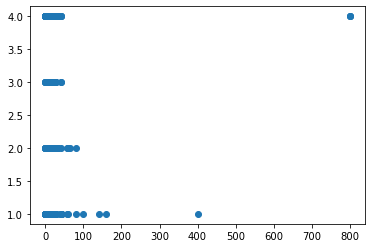

In [15]:
plt.scatter(land_cultivated_data,hfias) # the relationship before cleaning the data

### As we can see the data points of 400 and 800 is far beyond the graph, which are outliers that need to be deleted.

In [16]:
food_safety_tz=food_safety_tz.loc[food_safety_tz['land_cultivated_ha'] <200] #select the value <200

In [17]:
land_cultivated_data_processed_1=food_safety_tz['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hfias_processed_1 = food_safety_tz['hfias_status']

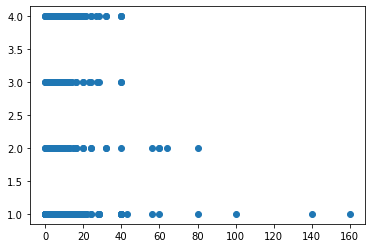

In [18]:
plt.scatter(land_cultivated_data_processed_1,hfias_processed_1) # the relationship after cleaning the data

### According to the mean function, the mean is nearly 5, and the data is meanly less than 40.

In [19]:
land_cultivated_data.mean()#the mean of land_cultivated data, we can see that there are lots of data far greater than 4.9

4.907408118081181

In [20]:
food_safety_tz=food_safety_tz.loc[food_safety_tz['land_cultivated_ha'] <40] #select the value <40, according to the graph

In [21]:
land_cultivated_data_processed=food_safety_tz['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hfias_processed = food_safety_tz['hfias_status']

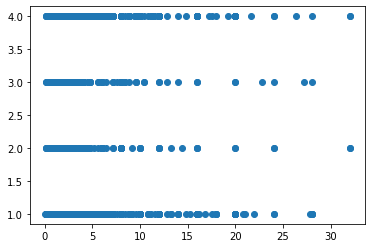

In [22]:
plt.scatter(land_cultivated_data_processed,hfias_processed) # the relationship after cleaning the data

### Then we use different bins to show the data

In [23]:
land_cultivated_data=food_safety_tz['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hfias = food_safety_tz['hfias_status']
food_safety_tz_2=food_safety_tz.loc[food_safety_tz['land_cultivated_ha']<=2] # data preprocessing
land_cultivated_data_2=food_safety_tz_2['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hfias_2 = food_safety_tz_2['hfias_status']
food_safety_tz_4=food_safety_tz.loc[(food_safety_tz['land_cultivated_ha']<=4)&(food_safety_tz['land_cultivated_ha']>2)]# data preprocessing
land_cultivated_data_4=food_safety_tz_4['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hfias_4 = food_safety_tz_4['hfias_status']
food_safety_tz_6=food_safety_tz.loc[(food_safety_tz['land_cultivated_ha']<=6)&(food_safety_tz['land_cultivated_ha']>4)]# data preprocessing
land_cultivated_data_6=food_safety_tz_6['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hfias_6 = food_safety_tz_6['hfias_status']
food_safety_tz_8=food_safety_tz.loc[(food_safety_tz['land_cultivated_ha']<=8)&(food_safety_tz['land_cultivated_ha']>6)]# data preprocessing
land_cultivated_data_8=food_safety_tz_8['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hfias_8 = food_safety_tz_8['hfias_status']
food_safety_tz_10=food_safety_tz.loc[(food_safety_tz['land_cultivated_ha']<=10)&(food_safety_tz['land_cultivated_ha']>8)]# data preprocessing
land_cultivated_data_10=food_safety_tz_10['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hfias_10 = food_safety_tz_10['hfias_status']
food_safety_tz_20=food_safety_tz.loc[(food_safety_tz['land_cultivated_ha']>10)&(food_safety_tz['land_cultivated_ha']<=20)]
land_cultivated_data_20=food_safety_tz_20['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hfias_20 = food_safety_tz_20['hfias_status']
food_safety_tz_40=food_safety_tz.loc[(food_safety_tz['land_cultivated_ha']>20)&(food_safety_tz['land_cultivated_ha']<=40)]
land_cultivated_data_40=food_safety_tz_40['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hfias_40 = food_safety_tz_40['hfias_status']

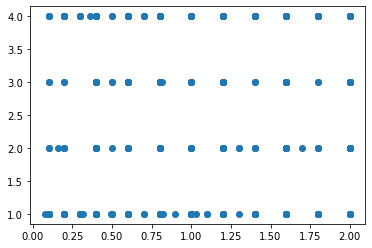

In [24]:
plt.scatter(land_cultivated_data_2,hfias_2)#land_cultivated_ha']<=2

In [25]:
import numpy as np
corrcoef_land_cultivated_ha_2=np.corrcoef(land_cultivated_data_2, hfias_2)#land_cultivated_ha
print(corrcoef_land_cultivated_ha_2) #the relationship between land cultivated and hfias, with the growing of land cultivated, the food security bocomes worse.

[[1.         0.09227871]
 [0.09227871 1.        ]]


In [26]:
hh_size_members_2=food_safety_tz_2['hh_size_members']
cov_hh_size_members_2 = np.cov(hh_size_members_2, hfias_2)
corrcoef_hh_size_members_2=np.corrcoef(hh_size_members_2, hfias_2)#land_cultivated_ha
print(cov_hh_size_members_2)
print(corrcoef_hh_size_members_2)#the relationship between household and hfias, with the growing of household, the food security bocomes better.

[[14.07145957 -0.65856864]
 [-0.65856864  1.75796525]]
[[ 1.         -0.13241169]
 [-0.13241169  1.        ]]


In [27]:
df_food_2 = pd.DataFrame(food_safety_tz_2,columns=['hfias_status','hh_size_members','land_cultivated_ha'])
corrMatrix_2 = df_food_2.corr()
print (corrMatrix_2) 

                    hfias_status  hh_size_members  land_cultivated_ha
hfias_status            1.000000        -0.132412            0.092279
hh_size_members        -0.132412         1.000000            0.087014
land_cultivated_ha      0.092279         0.087014            1.000000


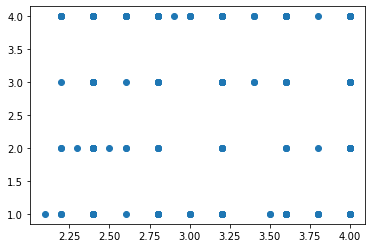

In [28]:
plt.scatter(land_cultivated_data_4,hfias_4)#2<land_cultivated_ha<=4

In [29]:
import numpy as np
cov_land_cultivated_ha_4 = np.cov(land_cultivated_data_4, hfias_4)
corrcoef_land_cultivated_ha_4=np.corrcoef(land_cultivated_data_4, hfias_4)#land_cultivated_ha
print(cov_land_cultivated_ha_4)
print(corrcoef_land_cultivated_ha_4) #the relationship 

[[ 0.39157308 -0.00887821]
 [-0.00887821  1.88141026]]
[[ 1.         -0.01034373]
 [-0.01034373  1.        ]]


In [30]:
hh_size_members_4=food_safety_tz_4['hh_size_members']
cov_hh_size_members_4 = np.cov(hh_size_members_4, hfias_4)
corrcoef_hh_size_members_4=np.corrcoef(hh_size_members_4, hfias_4)#land_cultivated_ha
print(cov_hh_size_members_4)
print(corrcoef_hh_size_members_4)

[[25.55421538 -1.31429487]
 [-1.31429487  1.88141026]]
[[ 1.         -0.18954825]
 [-0.18954825  1.        ]]


In [31]:
df_food_4 = pd.DataFrame(food_safety_tz_4,columns=['hfias_status','hh_size_members','land_cultivated_ha'])
corrMatrix_4 = df_food_4.corr()
print (corrMatrix_4) 

                    hfias_status  hh_size_members  land_cultivated_ha
hfias_status            1.000000        -0.189548           -0.010344
hh_size_members        -0.189548         1.000000            0.117961
land_cultivated_ha     -0.010344         0.117961            1.000000


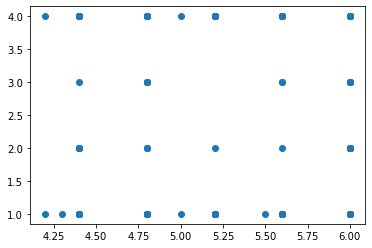

In [32]:
plt.scatter(land_cultivated_data_6,hfias_6)#4<land_cultivated_ha<=6

In [33]:
import numpy as np
cov_land_cultivated_ha_6 = np.cov(land_cultivated_data_6, hfias_6)
corrcoef_land_cultivated_ha_6=np.corrcoef(land_cultivated_data_6, hfias_6)#land_cultivated_ha
print(cov_land_cultivated_ha_6)
print(corrcoef_land_cultivated_ha_6) #the relationship 

[[ 0.36246231 -0.0483505 ]
 [-0.0483505   1.93222869]]
[[ 1.         -0.05777504]
 [-0.05777504  1.        ]]


In [34]:
hh_size_members_6=food_safety_tz_6['hh_size_members']
cov_hh_size_members_6 = np.cov(hh_size_members_6, hfias_6)
corrcoef_hh_size_members_6=np.corrcoef(hh_size_members_6, hfias_6)#land_cultivated_ha
print(cov_hh_size_members_6)
print(corrcoef_hh_size_members_6)

[[42.02560084 -2.35900881]
 [-2.35900881  1.93222869]]
[[ 1.         -0.26178414]
 [-0.26178414  1.        ]]


In [35]:
df_food_6 = pd.DataFrame(food_safety_tz_6,columns=['hfias_status','hh_size_members','land_cultivated_ha'])
corrMatrix_6 = df_food_6.corr()
print (corrMatrix_6) 

                    hfias_status  hh_size_members  land_cultivated_ha
hfias_status            1.000000        -0.261784           -0.057775
hh_size_members        -0.261784         1.000000            0.082230
land_cultivated_ha     -0.057775         0.082230            1.000000


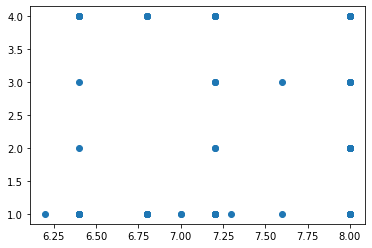

In [36]:
plt.scatter(land_cultivated_data_8,hfias_8)#6<land_cultivated_ha<=8

In [37]:
import numpy as np
cov_land_cultivated_ha_8 = np.cov(land_cultivated_data_8, hfias_8)
corrcoef_land_cultivated_ha_8=np.corrcoef(land_cultivated_data_8, hfias_8)#land_cultivated_ha
print(cov_land_cultivated_ha_8)
print(corrcoef_land_cultivated_ha_8) #the relationship 

[[ 0.38644922 -0.03712801]
 [-0.03712801  1.66877657]]
[[ 1.         -0.04623346]
 [-0.04623346  1.        ]]


In [38]:
hh_size_members_8=food_safety_tz_8['hh_size_members']
cov_hh_size_members_8 = np.cov(hh_size_members_8, hfias_8)
corrcoef_hh_size_members_8=np.corrcoef(hh_size_members_8, hfias_8)#land_cultivated_ha
print(cov_hh_size_members_8)
print(corrcoef_hh_size_members_8)

[[55.33835616 -1.92338214]
 [-1.92338214  1.66877657]]
[[ 1.         -0.20014897]
 [-0.20014897  1.        ]]


In [39]:
df_food_8 = pd.DataFrame(food_safety_tz_8,columns=['hfias_status','hh_size_members','land_cultivated_ha'])
corrMatrix_8 = df_food_8.corr()
print (corrMatrix_8) 

                    hfias_status  hh_size_members  land_cultivated_ha
hfias_status            1.000000        -0.200149           -0.046233
hh_size_members        -0.200149         1.000000            0.047997
land_cultivated_ha     -0.046233         0.047997            1.000000


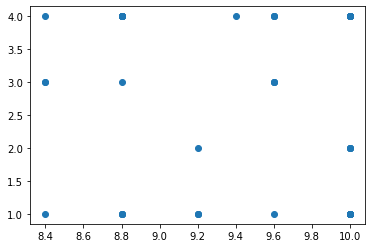

In [40]:
plt.scatter(land_cultivated_data_10,hfias_10)#8<land_cultivated_ha<=10

In [41]:
import numpy as np
cov_land_cultivated_ha_10 = np.cov(land_cultivated_data_10, hfias_10)
corrcoef_land_cultivated_ha_10=np.corrcoef(land_cultivated_data_10, hfias_10)#land_cultivated_ha
print(cov_land_cultivated_ha_10)
print(corrcoef_land_cultivated_ha_10) #the relationship 

[[ 0.33006494 -0.17681818]
 [-0.17681818  1.875     ]]
[[ 1.         -0.22476392]
 [-0.22476392  1.        ]]


In [42]:
hh_size_members_10=food_safety_tz_10['hh_size_members']
cov_hh_size_members_10 = np.cov(hh_size_members_10, hfias_10)
corrcoef_hh_size_members_10=np.corrcoef(hh_size_members_10, hfias_10)#land_cultivated_ha
print(cov_hh_size_members_10)
print(corrcoef_hh_size_members_10)

[[76.04545455 -3.29545455]
 [-3.29545455  1.875     ]]
[[ 1.         -0.27598029]
 [-0.27598029  1.        ]]


In [43]:
df_food_10 = pd.DataFrame(food_safety_tz_10,columns=['hfias_status','hh_size_members','land_cultivated_ha'])
corrMatrix_10 = df_food_10.corr()
print (corrMatrix_10) 

                    hfias_status  hh_size_members  land_cultivated_ha
hfias_status            1.000000        -0.275980           -0.224764
hh_size_members        -0.275980         1.000000            0.117039
land_cultivated_ha     -0.224764         0.117039            1.000000


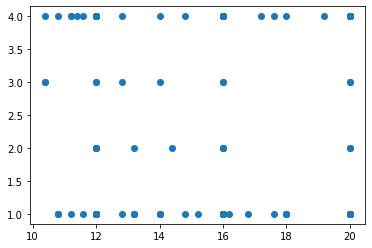

In [44]:
plt.scatter(land_cultivated_data_20,hfias_20)#10<land_cultivated_ha<=20

In [45]:
import numpy as np
cov_land_cultivated_ha_20 = np.cov(land_cultivated_data_20, hfias_20)
corrcoef_land_cultivated_ha_20=np.corrcoef(land_cultivated_data_20, hfias_20)#land_cultivated_ha
print(cov_land_cultivated_ha_20)
print(corrcoef_land_cultivated_ha_20) #the relationship 

[[10.91340601 -0.29395591]
 [-0.29395591  1.90310078]]
[[ 1.        -0.0645017]
 [-0.0645017  1.       ]]


In [46]:
hh_size_members_20=food_safety_tz_20['hh_size_members']
cov_hh_size_members_20 = np.cov(hh_size_members_20, hfias_20)
corrcoef_hh_size_members_20=np.corrcoef(hh_size_members_20, hfias_20)#land_cultivated_ha
print(cov_hh_size_members_20)
print(corrcoef_hh_size_members_20)

[[110.33829942  -3.61755087]
 [ -3.61755087   1.90310078]]
[[ 1.        -0.2496437]
 [-0.2496437  1.       ]]


In [47]:
df_food_20 = pd.DataFrame(food_safety_tz_20,columns=['hfias_status','hh_size_members','land_cultivated_ha'])
corrMatrix_20 = df_food_20.corr()
print (corrMatrix_20) 

                    hfias_status  hh_size_members  land_cultivated_ha
hfias_status            1.000000        -0.249644           -0.064502
hh_size_members        -0.249644         1.000000            0.234279
land_cultivated_ha     -0.064502         0.234279            1.000000


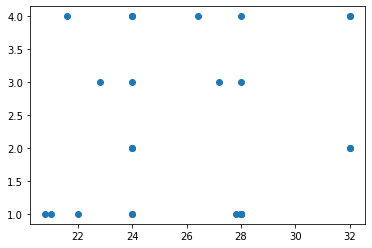

In [48]:
plt.scatter(land_cultivated_data_40,hfias_40)#20<land_cultivated_ha<=40

In [49]:
import numpy as np
cov_land_cultivated_ha_40 = np.cov(land_cultivated_data_40, hfias_40)
corrcoef_land_cultivated_ha_40=np.corrcoef(land_cultivated_data_40, hfias_40)#land_cultivated_ha
print(cov_land_cultivated_ha_40)
print(corrcoef_land_cultivated_ha_40) #the relationship 

[[12.41506667  0.71866667]
 [ 0.71866667  1.64333333]]
[[1.         0.15910731]
 [0.15910731 1.        ]]


In [50]:
hh_size_members_40=food_safety_tz_40['hh_size_members']
cov_hh_size_members_40 = np.cov(hh_size_members_40, hfias_40)
corrcoef_hh_size_members_40=np.corrcoef(hh_size_members_40, hfias_40)#land_cultivated_ha
print(cov_hh_size_members_40)
print(corrcoef_hh_size_members_40)

[[46.54       -1.52833333]
 [-1.52833333  1.64333333]]
[[ 1.         -0.17476001]
 [-0.17476001  1.        ]]


In [51]:
df_food_40 = pd.DataFrame(food_safety_tz_40,columns=['hfias_status','hh_size_members','land_cultivated_ha'])
corrMatrix_40 = df_food_40.corr()
print (corrMatrix_40) 

                    hfias_status  hh_size_members  land_cultivated_ha
hfias_status            1.000000        -0.174760            0.159107
hh_size_members        -0.174760         1.000000            0.008223
land_cultivated_ha      0.159107         0.008223            1.000000


In [52]:
hh_size_members=food_safety_tz['hh_size_members']
hfias_hh = food_safety_tz['hfias_status']

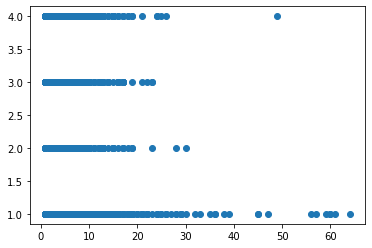

In [53]:
plt.scatter(hh_size_members,hfias_hh)

In [54]:
hh_size_members.mean()

6.736763609246831

### We can see that household size members mainly less than 40. When the number is larger than 40, the food security could be weird. According to the previous research, the food security should be better with the growing of land cultivated. Also, the food security should be worse with the increasing of population.

In [55]:
food_safety_tz=food_safety_tz.loc[food_safety_tz['hh_size_members'] <40] #select the value <40

In [56]:
hh_size_members=food_safety_tz['hh_size_members']
hfias_hh = food_safety_tz['hfias_status']

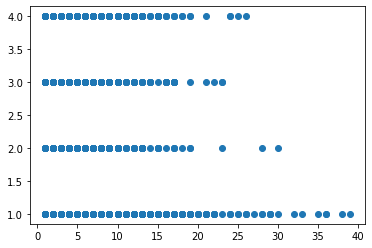

In [57]:
plt.scatter(hh_size_members,hfias_hh)

### We can see that when the data is larger than 40, the points are too few to be used.

In [58]:
food_safety_tz.mean()

C:\Users\chenl\AppData\Local\Temp\ipykernel_7760\1846632248.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  food_safety_tz.mean()


hfias_status          2.202920
hh_size_members       6.538750
land_cultivated_ha    3.352106
dtype: float64

In [59]:
land_cultivated_data_processed=food_safety_tz['land_cultivated_ha'] #select column land_cultivated_ha from dataset

### Here are the results after the data cleaning, then we want to select the data points in each project.

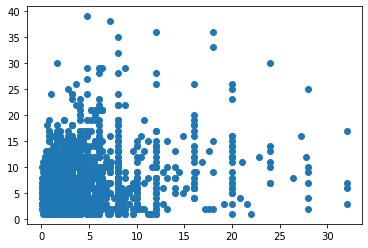

In [60]:
plt.scatter(land_cultivated_data_processed,hh_size_members) # the relationship before cleaning the data

### In order to show the correct result, we need to control the number of household and "land cultivated". Based on the previous reseach, we started to select the proper data to be used, Here are the results in diffeerent projects.

## Cfm

In [61]:
food_safety_tz_cfm=food_safety_tz.loc[food_safety_tz['id_proj'] == 'cfm']#select the CFM from the data

In [62]:
land_cultivated_data_cfm=food_safety_tz_cfm['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hh_size_members_cfm=food_safety_tz_cfm['hh_size_members']
hfias_hh_cfm = food_safety_tz_cfm['hfias_status']

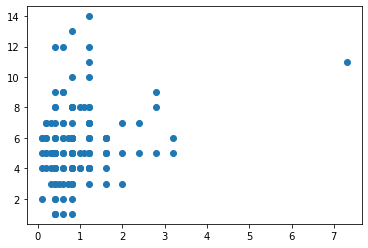

In [63]:
plt.scatter(land_cultivated_data_cfm,hh_size_members_cfm) 

In [64]:
land_cultivated_data_cfm_1=food_safety_tz_cfm.loc[food_safety_tz_cfm['land_cultivated_ha'] <6] #select the land_cultivated_data_ha value <6

In [65]:
land_cultivated_data_cfm_2=land_cultivated_data_cfm_1['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hh_size_members_cfm=land_cultivated_data_cfm_1['hh_size_members']
hfias_hh_cfm = land_cultivated_data_cfm_1['hfias_status']

                    hfias_status  hh_size_members  land_cultivated_ha
hfias_status            1.000000         0.056850           -0.119781
hh_size_members         0.056850         1.000000            0.144538
land_cultivated_ha     -0.119781         0.144538            1.000000


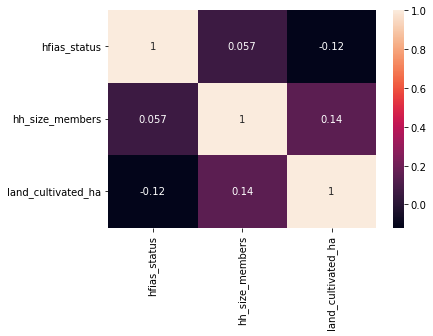

In [66]:
df_food_cfm = pd.DataFrame(land_cultivated_data_cfm_1,columns=['hfias_status','hh_size_members','land_cultivated_ha'])
corrMatrix_cfm = df_food_cfm.corr()
print (corrMatrix_cfm) 
sn.heatmap(corrMatrix_cfm, annot=True)
plt.show()

Text(0.5, 1.0, 'hfias_cfm')

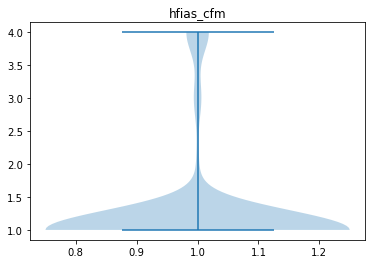

In [67]:
hfias_status_cfm = land_cultivated_data_cfm_1['hfias_status']
fig, ax = plt.subplots()
ax.violinplot([hfias_status_cfm])
ax.set_title('hfias_cfm')

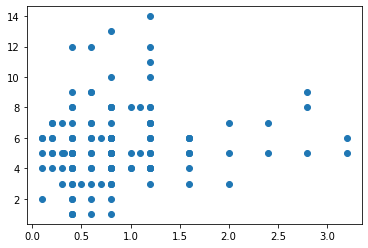

In [68]:
plt.scatter(land_cultivated_data_cfm_2,hh_size_members_cfm) 

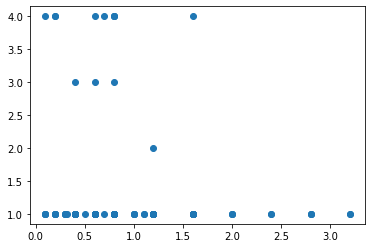

In [69]:
plt.scatter(land_cultivated_data_cfm_2,hfias_hh_cfm) 

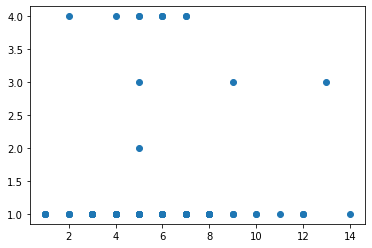

In [70]:
plt.scatter(hh_size_members_cfm,hfias_hh_cfm) 

In [71]:
hh_size_members_cfm

28766     4
28767    10
28768     5
28769    11
28770     6
         ..
28912     3
28913     4
28914     5
28915     3
28916     3
Name: hh_size_members, Length: 135, dtype: int64

In [72]:
import numpy as np
cov_land_cultivated_ha_cfm = np.cov(land_cultivated_data_cfm_2, hfias_hh_cfm)
corrcoef_land_cultivated_ha_cfm=np.corrcoef(land_cultivated_data_cfm_2,hfias_hh_cfm)#land_cultivated_ha
print(cov_land_cultivated_ha_cfm)
print(corrcoef_land_cultivated_ha_cfm) #the relationship 

[[ 0.38983514 -0.05971697]
 [-0.05971697  0.63758983]]
[[ 1.         -0.11978063]
 [-0.11978063  1.        ]]


In [73]:
import numpy as np
cov_hh_size_members_cfm = np.cov(hh_size_members_cfm, hfias_hh_cfm)
corrcoef_hh_size_members_cfm=np.corrcoef(hh_size_members_cfm,hfias_hh_cfm)#land_cultivated_ha
print(cov_hh_size_members_cfm)
print(corrcoef_hh_size_members_cfm) #plot

[[5.77258154 0.10906578]
 [0.10906578 0.63758983]]
[[1.        0.0568503]
 [0.0568503 1.       ]]


In [74]:
land_cultivated_data_cfm_1

,id_country,country,id_proj,hfias_status,hh_size_members,land_cultivated_ha
28766,tz,tanzania,cfm,1,4,0.8
28767,tz,tanzania,cfm,1,10,0.8
28768,tz,tanzania,cfm,1,5,0.8
28769,tz,tanzania,cfm,1,11,1.2
28770,tz,tanzania,cfm,4,6,0.8
...,...,...,...,...,...,...
28912,tz,tanzania,cfm,1,3,1.6
28913,tz,tanzania,cfm,1,4,0.4
28914,tz,tanzania,cfm,1,5,0.1
28915,tz,tanzania,cfm,1,3,0.3


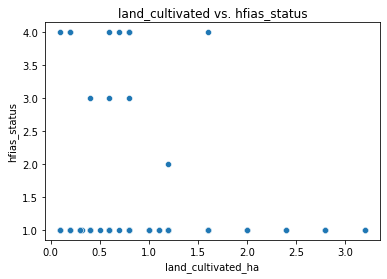

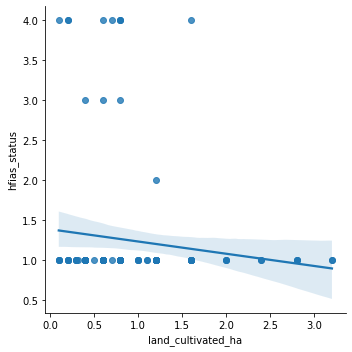

In [75]:
import seaborn as sns
ax1=sns.scatterplot(x='land_cultivated_ha', y='hfias_status', data=land_cultivated_data_cfm_1);
ax1.set_title("land_cultivated vs. hfias_status")
ax.set_xlabel("land_cultivated");
sns.lmplot(x='land_cultivated_ha', y='hfias_status', data=land_cultivated_data_cfm_1);

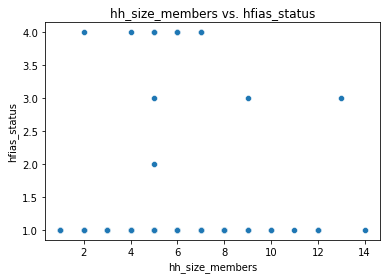

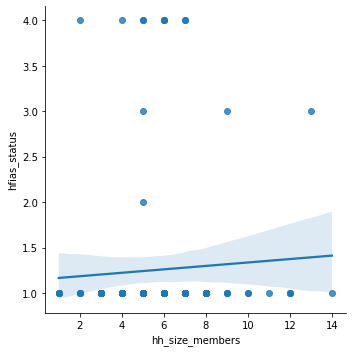

In [76]:
import seaborn as sns
ax1=sns.scatterplot(x='hh_size_members', y='hfias_status', data=land_cultivated_data_cfm_1);
ax1.set_title("hh_size_members vs. hfias_status")
ax.set_xlabel("hh_size_members");
sns.lmplot(x='hh_size_members', y='hfias_status', data=land_cultivated_data_cfm_1);

In [ ]:
cfm_1

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=42)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.dummy import DummyRegressor # the baseline that we are going to use
dummy_regr.predict(X)
import numpy as np #linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

lr_model= LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_train_lr = lr_model.predict(X_train)
print('Linear Regression - Training Metrics')
print('MAE:', mean_absolute_error(y_train, y_pred_train_lr))
print('MSE:', mean_squared_error(y_train, y_pred_train_lr))
print('RMSE:',math.sqrt(mean_squared_error(y_train, y_pred_train_lr)))
print('R2:', cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=-1).mean())

## Cra

In [77]:
food_safety_tz_cra=food_safety_tz.loc[food_safety_tz['id_proj'] == 'cra']#select the CRM project from the data

In [78]:
land_cultivated_data_cra=food_safety_tz_cra['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hh_size_members_cra=food_safety_tz_cra['hh_size_members']
hfias_hh_cra = food_safety_tz_cra['hfias_status']

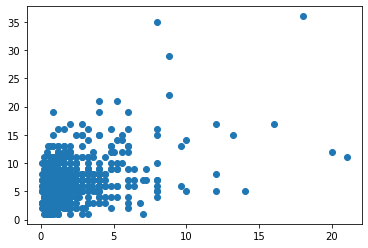

In [79]:
plt.scatter(land_cultivated_data_cra,hh_size_members_cra) 

In [80]:
land_cultivated_data_cra_1=food_safety_tz_cra.loc[food_safety_tz_cra['land_cultivated_ha'] <8] #select the value <6
land_cultivated_data_cra=land_cultivated_data_cra_1['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hh_size_members_cra=land_cultivated_data_cra_1['hh_size_members']
hfias_hh_cra = land_cultivated_data_cra_1['hfias_status']

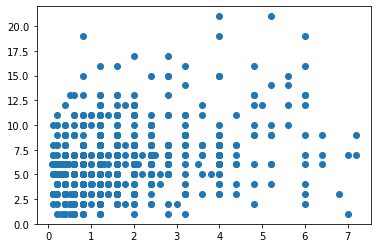

In [81]:
plt.scatter(land_cultivated_data_cra,hh_size_members_cra) 

In [82]:
land_cultivated_data_cra_2=land_cultivated_data_cra_1.loc[land_cultivated_data_cra_1['hh_size_members'] <15] #select the value <6
land_cultivated_data_cra=land_cultivated_data_cra_2['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hh_size_members_cra=land_cultivated_data_cra_2['hh_size_members']
hfias_hh_cra = land_cultivated_data_cra_2['hfias_status']

                    hfias_status  hh_size_members  land_cultivated_ha
hfias_status            1.000000         0.039266           -0.076813
hh_size_members         0.039266         1.000000            0.266389
land_cultivated_ha     -0.076813         0.266389            1.000000


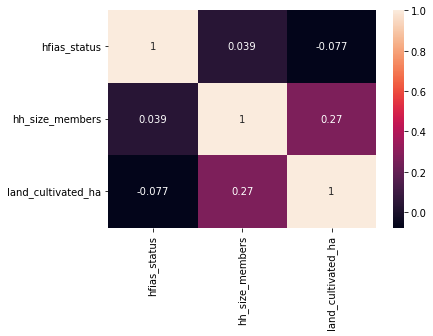

In [83]:
df_food_cra = pd.DataFrame(land_cultivated_data_cra_2,columns=['hfias_status','hh_size_members','land_cultivated_ha'])
corrMatrix_cra = df_food_cra.corr()
print (corrMatrix_cra) 
sn.heatmap(corrMatrix_cra, annot=True)
plt.show()

Text(0.5, 1.0, 'hfias_cra')

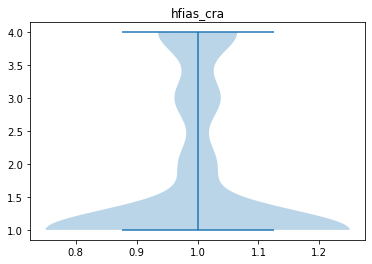

In [84]:
fig, ax = plt.subplots()
ax.violinplot([hfias_hh_cra])
ax.set_title('hfias_cra')

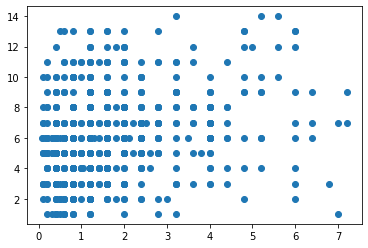

In [85]:
plt.scatter(land_cultivated_data_cra,hh_size_members_cra) 

In [86]:
import numpy as np
cov_land_cultivated_ha_cra = np.cov(land_cultivated_data_cra, hfias_hh_cra)
corrcoef_land_cultivated_ha_cra=np.corrcoef(land_cultivated_data_cra,hfias_hh_cra)#land_cultivated_ha
print(cov_land_cultivated_ha_cra)
print(corrcoef_land_cultivated_ha_cra) #plot

[[ 1.80992057 -0.121447  ]
 [-0.121447    1.38115529]]
[[ 1.         -0.07681318]
 [-0.07681318  1.        ]]


In [87]:
import numpy as np
cov_hh_size_members_cra = np.cov(hh_size_members_cra, hfias_hh_cra)
corrcoef_hh_size_members_cra=np.corrcoef(hh_size_members_cra,hfias_hh_cra)#land_cultivated_ha
print(cov_hh_size_members_cra)
print(corrcoef_hh_size_members_cra) #plot

[[7.37680087 0.12533633]
 [0.12533633 1.38115529]]
[[1.         0.03926646]
 [0.03926646 1.        ]]


,id_country,country,id_proj,hfias_status,hh_size_members,land_cultivated_ha
28917,tz,tanzania,cra,1,5,3.80
28918,tz,tanzania,cra,1,6,2.00
28919,tz,tanzania,cra,1,6,1.60
28920,tz,tanzania,cra,1,6,0.80
28921,tz,tanzania,cra,1,5,0.30
...,...,...,...,...,...,...
29753,tz,tanzania,cra,3,5,0.40
29754,tz,tanzania,cra,1,6,0.08
29755,tz,tanzania,cra,1,11,0.20
29756,tz,tanzania,cra,1,11,1.60


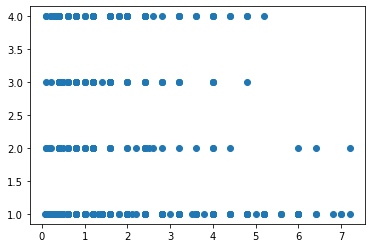

In [88]:
plt.scatter(land_cultivated_data_cra,hfias_hh_cra) 

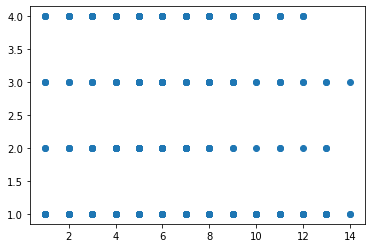

In [89]:
plt.scatter(hh_size_members_cra,hfias_hh_cra) 

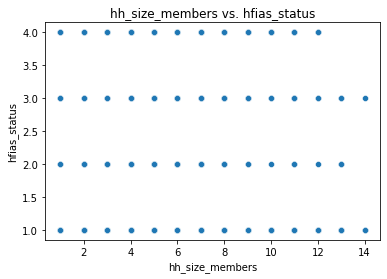

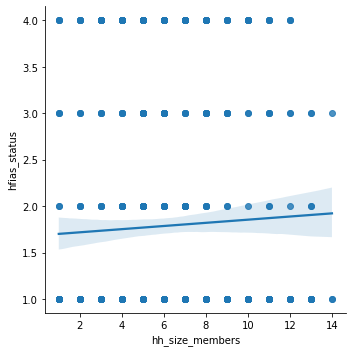

In [90]:
import seaborn as sns
ax1=sns.scatterplot(x='hh_size_members', y='hfias_status', data=land_cultivated_data_cra_2);
ax1.set_title("hh_size_members vs. hfias_status")
ax.set_xlabel("hh_size_members");
sns.lmplot(x='hh_size_members', y='hfias_status', data=land_cultivated_data_cra_2);

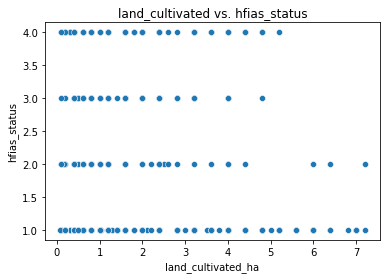

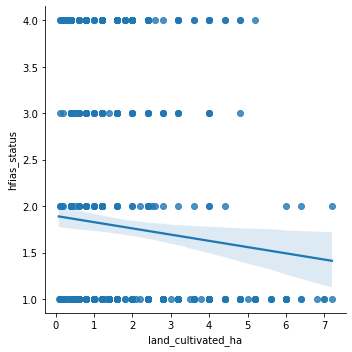

In [91]:
import seaborn as sns
ax1=sns.scatterplot(x='land_cultivated_ha', y='hfias_status', data=land_cultivated_data_cra_2);
ax1.set_title("land_cultivated vs. hfias_status")
ax.set_xlabel("land_cultivated");
sns.lmplot(x='land_cultivated_ha', y='hfias_status', data=land_cultivated_data_cra_2);

In [133]:
land_cultivated_data_cra_2

,id_country,country,id_proj,hfias_status,hh_size_members,land_cultivated_ha
28917,tz,tanzania,cra,1,5,3.80
28918,tz,tanzania,cra,1,6,2.00
28919,tz,tanzania,cra,1,6,1.60
28920,tz,tanzania,cra,1,6,0.80
28921,tz,tanzania,cra,1,5,0.30
...,...,...,...,...,...,...
29753,tz,tanzania,cra,3,5,0.40
29754,tz,tanzania,cra,1,6,0.08
29755,tz,tanzania,cra,1,11,0.20
29756,tz,tanzania,cra,1,11,1.60


In [135]:
land_cultivated_data_cra_2.drop(columns='id_country', inplace=True)

C:\Users\chenl\AppData\Local\Temp\ipykernel_7760\1290841480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  land_cultivated_data_cra_2.drop(columns='id_country', inplace=True)


In [136]:
land_cultivated_data_cra_2.drop(columns='country', inplace=True)

C:\Users\chenl\AppData\Local\Temp\ipykernel_7760\4186938301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  land_cultivated_data_cra_2.drop(columns='country', inplace=True)


In [137]:
land_cultivated_data_cra_2.drop(columns='id_proj', inplace=True)

C:\Users\chenl\AppData\Local\Temp\ipykernel_7760\724877608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  land_cultivated_data_cra_2.drop(columns='id_proj', inplace=True)


In [157]:
land_cultivated_data_cra_2_1=pd.DataFrame(land_cultivated_data_cra_2,columns=["hfias_status","hh_size_members"])
land_cultivated_data_cra_2_2=pd.DataFrame(land_cultivated_data_cra_2,columns=["hfias_status","land_cultivated_ha"])

In [175]:
target = "hfias_status" #Select the data that we are going to use in the dataset

X = land_cultivated_data_cra_2_2.drop(columns=target)
y = land_cultivated_data_cra_2_2[target]

In [176]:
from sklearn.model_selection import train_test_split, cross_val_score

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=42)

In [178]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [179]:
import numpy as np
from sklearn.dummy import DummyRegressor # the baseline that we are going to use


In [180]:
dummy_regr = DummyRegressor(strategy="mean",quantile=0.6) # we are going to use mean strategy 

In [181]:
dummy_regr.fit(X, y) # use our model to fit the data

DummyRegressor(quantile=0.6)

In [182]:
dummy_regr.predict(X)

array([1.78451613, 1.78451613, 1.78451613, 1.78451613, 1.78451613,
       1.78451613, 1.78451613, 1.78451613, 1.78451613, 1.78451613,
       1.78451613, 1.78451613, 1.78451613, 1.78451613, 1.78451613,
       1.78451613, 1.78451613, 1.78451613, 1.78451613, 1.78451613,
       1.78451613, 1.78451613, 1.78451613, 1.78451613, 1.78451613,
       1.78451613, 1.78451613, 1.78451613, 1.78451613, 1.78451613,
       1.78451613, 1.78451613, 1.78451613, 1.78451613, 1.78451613,
       1.78451613, 1.78451613, 1.78451613, 1.78451613, 1.78451613,
       1.78451613, 1.78451613, 1.78451613, 1.78451613, 1.78451613,
       1.78451613, 1.78451613, 1.78451613, 1.78451613, 1.78451613,
       1.78451613, 1.78451613, 1.78451613, 1.78451613, 1.78451613,
       1.78451613, 1.78451613, 1.78451613, 1.78451613, 1.78451613,
       1.78451613, 1.78451613, 1.78451613, 1.78451613, 1.78451613,
       1.78451613, 1.78451613, 1.78451613, 1.78451613, 1.78451613,
       1.78451613, 1.78451613, 1.78451613, 1.78451613, 1.78451

In [183]:
dummy_regr.score(X, y) #our baseline

0.0

In [184]:
# The mean Baseline of 'Rented Bike Count' is near 735

baseline_acc = y_train.mean()
print('baseline:', round(baseline_acc, 1))

baseline: 1.8


In [185]:
#R2 equals to 0 is our horizontal line
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
y_pred_baseline = [baseline_acc] * len(X_train)
print('Baseline - Training Metrics')
print('Baseline MAE:', mean_absolute_error(y_train, y_pred_baseline)) #the prediction of MAE
print('Baseline MSE:', mean_squared_error(y_train, y_pred_baseline))#the prediction of MSE
print('Baseline RMSE:', math.sqrt(mean_squared_error(y_train, y_pred_baseline))) #the prediction of RMSE
print('Baseline R2:', r2_score(y_train, y_pred_baseline)) #the prediction of R2,which is the same as dummy_mean

Baseline - Training Metrics
Baseline MAE: 1.040582726326743
Baseline MSE: 1.3947970863683663
Baseline RMSE: 1.1810152777878729
Baseline R2: 0.0


In [186]:
import numpy as np #linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

lr_model= LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_train_lr = lr_model.predict(X_train)
print('Linear Regression - Training Metrics')
print('MAE:', mean_absolute_error(y_train, y_pred_train_lr))
print('MSE:', mean_squared_error(y_train, y_pred_train_lr))
print('RMSE:',math.sqrt(mean_squared_error(y_train, y_pred_train_lr)))
print('R2:', cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=-1).mean())

Linear Regression - Training Metrics
MAE: 1.0105472497825083
MSE: 1.356729875690355
RMSE: 1.164787480912443
R2: 0.00209885250761066


In [187]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score

In [188]:
rf_model=RandomForestRegressor( #RandomForest
         random_state=42,n_estimators=100,
        max_depth=21)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=21, random_state=42)

In [189]:
y_pred_train_rf = rf_model.predict(X_train)
print('Random Forest - Training Metrics')
print('MAE:', mean_absolute_error(y_train, y_pred_train_rf))
print('MSE:', mean_squared_error(y_train, y_pred_train_rf))
print('RMSE:',math.sqrt(mean_squared_error(y_train, y_pred_train_rf)))
print('R2:', cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=-1).mean())

Random Forest - Training Metrics
MAE: 0.9045915231203876
MSE: 1.1868915080505604
RMSE: 1.0894455048558236
R2: -0.07942382876237115


In [190]:
y_pred_test_rf = rf_model.predict(X_test) #test on the test sets
print('Random Forest - Test Metrics')
print('MAE:', mean_absolute_error(y_test, y_pred_test_rf))
print('MSE:', mean_squared_error(y_test, y_pred_test_rf))
print('RMSE:',math.sqrt(mean_squared_error(y_test, y_pred_test_rf)))
print('R2:', r2_score(y_test, y_pred_test_rf))

Random Forest - Test Metrics
MAE: 1.0142315013429744
MSE: 1.491510897072813
RMSE: 1.2212742923163546
R2: -0.08444590287103315


## Glv

In [92]:
food_safety_tz_glv=food_safety_tz.loc[food_safety_tz['id_proj'] == 'glv']#select the GLV project from the data

In [93]:
land_cultivated_data_glv=food_safety_tz_glv['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hh_size_members_glv=food_safety_tz_glv['hh_size_members']
hfias_hh_glv = food_safety_tz_glv['hfias_status']

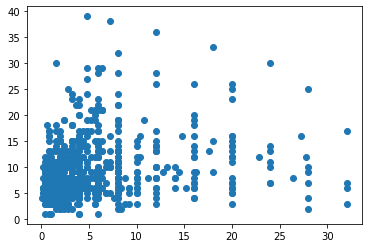

In [94]:
plt.scatter(land_cultivated_data_glv,hh_size_members_glv) 

In [95]:
land_cultivated_data_glv_1=food_safety_tz_glv.loc[food_safety_tz_glv['land_cultivated_ha'] <20] #select the value <20
land_cultivated_data_glv=land_cultivated_data_glv_1['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hh_size_members_glv=land_cultivated_data_glv_1['hh_size_members']
hfias_hh_glv = land_cultivated_data_glv_1['hfias_status']

In [96]:
land_cultivated_data_glv_2=land_cultivated_data_glv_1.loc[food_safety_tz_glv['hh_size_members'] <15] #select the value <15
land_cultivated_data_glv=land_cultivated_data_glv_2['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hh_size_members_glv=land_cultivated_data_glv_2['hh_size_members']
hfias_hh_glv = land_cultivated_data_glv_2['hfias_status']

                    hfias_status  hh_size_members  land_cultivated_ha
hfias_status            1.000000        -0.022443            0.040748
hh_size_members        -0.022443         1.000000            0.242989
land_cultivated_ha      0.040748         0.242989            1.000000


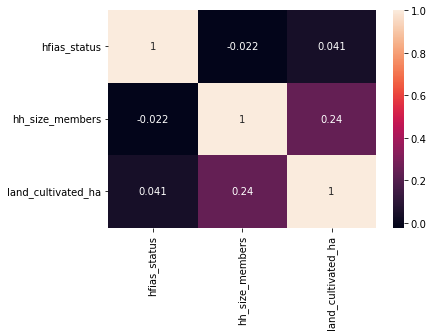

In [97]:
df_food_glv = pd.DataFrame(land_cultivated_data_glv_2,columns=['hfias_status','hh_size_members','land_cultivated_ha'])
corrMatrix_glv = df_food_glv.corr()
print (corrMatrix_glv) 
sn.heatmap(corrMatrix_glv, annot=True)
plt.show()

Text(0.5, 1.0, 'hfias_glv')

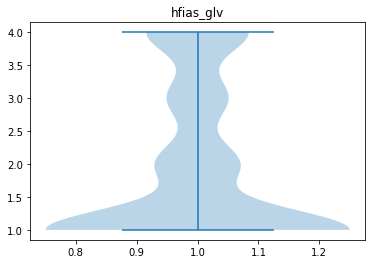

In [98]:
fig, ax = plt.subplots()
ax.violinplot([hfias_hh_glv])
ax.set_title('hfias_glv')

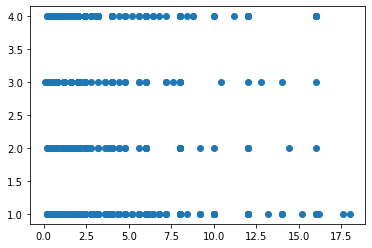

In [99]:
plt.scatter(land_cultivated_data_glv,hfias_hh_glv) 

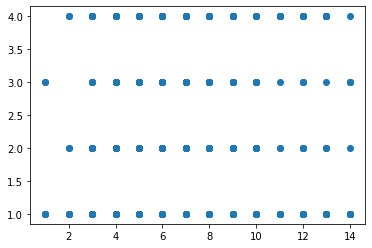

In [100]:
plt.scatter(hh_size_members_glv,hfias_hh_glv) 

In [101]:
import numpy as np
cov_land_cultivated_ha_glv = np.cov(land_cultivated_data_glv, hfias_hh_glv)
corrcoef_land_cultivated_ha_glv=np.corrcoef(land_cultivated_data_glv,hfias_hh_glv)#land_cultivated_ha
print(cov_land_cultivated_ha_glv)
print(corrcoef_land_cultivated_ha_glv) #plot

[[11.89344384  0.16625753]
 [ 0.16625753  1.39973652]]
[[1.         0.04074782]
 [0.04074782 1.        ]]


In [102]:
import numpy as np
cov_hh_size_members_glv = np.cov(hh_size_members_glv, hfias_hh_glv)
corrcoef_hh_size_members_glv=np.corrcoef(hh_size_members_glv,hfias_hh_glv)#land_cultivated_ha
print(cov_hh_size_members_glv)
print(corrcoef_hh_size_members_glv) #plot

[[ 7.85876954 -0.07443636]
 [-0.07443636  1.39973652]]
[[ 1.        -0.0224432]
 [-0.0224432  1.       ]]


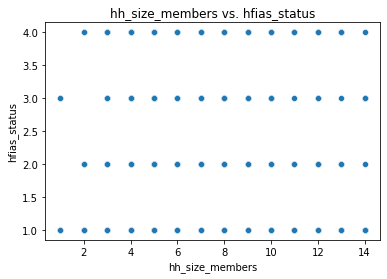

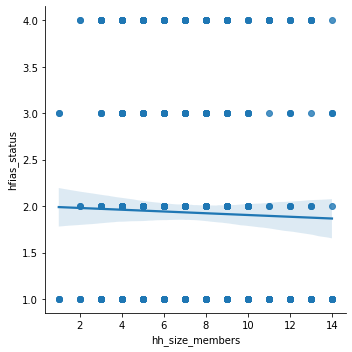

In [103]:
import seaborn as sns
ax1=sns.scatterplot(x='hh_size_members', y='hfias_status', data=land_cultivated_data_glv_2);
ax1.set_title("hh_size_members vs. hfias_status")
ax.set_xlabel("hh_size_members");
sns.lmplot(x='hh_size_members', y='hfias_status', data=land_cultivated_data_glv_2);

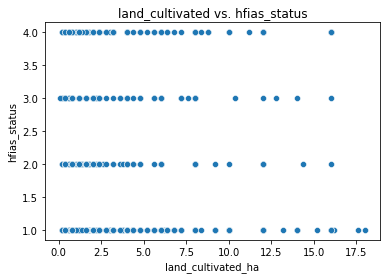

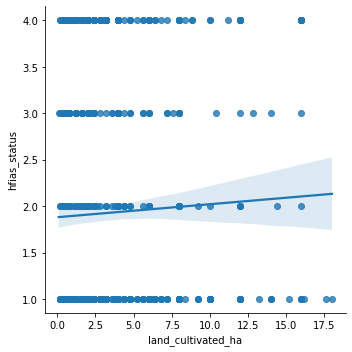

In [104]:
import seaborn as sns
ax1=sns.scatterplot(x='land_cultivated_ha', y='hfias_status', data=land_cultivated_data_glv_2);
ax1.set_title("land_cultivated vs. hfias_status")
ax.set_xlabel("land_cultivated");
sns.lmplot(x='land_cultivated_ha', y='hfias_status', data=land_cultivated_data_glv_2);

## Srl

In [105]:
food_safety_tz_srl=food_safety_tz.loc[food_safety_tz['id_proj'] == 'srl']#select the GLV project from the data

In [106]:
land_cultivated_data_srl=food_safety_tz_srl['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hh_size_members_srl=food_safety_tz_srl['hh_size_members']
hfias_hh_srl = food_safety_tz_srl['hfias_status']

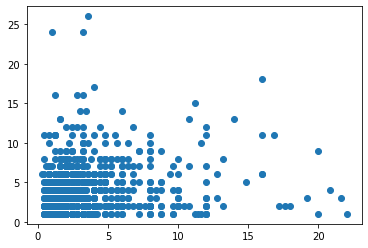

In [107]:
plt.scatter(land_cultivated_data_srl,hh_size_members_srl) 

In [108]:
land_cultivated_data_srl_1=food_safety_tz_srl.loc[food_safety_tz_srl['land_cultivated_ha'] <15] #select the value <6
land_cultivated_data_srl=land_cultivated_data_srl_1['land_cultivated_ha'] #select column land_cultivated_ha from dataset
hh_size_members_srl=land_cultivated_data_srl_1['hh_size_members']
hfias_hh_srl = land_cultivated_data_srl_1['hfias_status']

                    hfias_status  hh_size_members  land_cultivated_ha
hfias_status            1.000000        -0.032212           -0.143379
hh_size_members        -0.032212         1.000000            0.091301
land_cultivated_ha     -0.143379         0.091301            1.000000


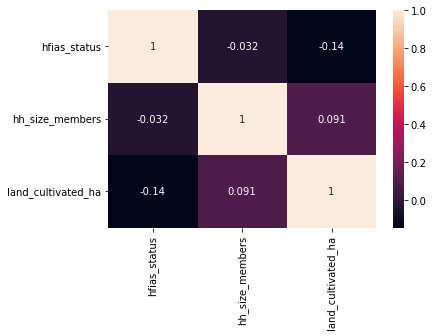

In [109]:
df_food_srl = pd.DataFrame(land_cultivated_data_srl_1,columns=['hfias_status','hh_size_members','land_cultivated_ha'])
corrMatrix_srl = df_food_srl.corr()
print (corrMatrix_srl) 
sn.heatmap(corrMatrix_srl, annot=True)
plt.show()

Text(0.5, 1.0, 'hfias_srl')

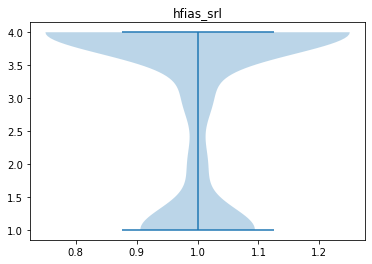

In [110]:
fig, ax = plt.subplots()
ax.violinplot([hfias_hh_srl])
ax.set_title('hfias_srl')

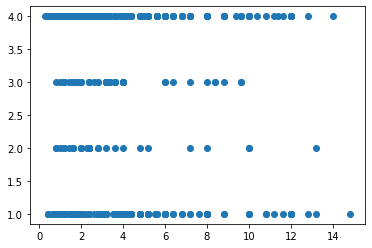

In [111]:
plt.scatter(land_cultivated_data_srl,hfias_hh_srl) 

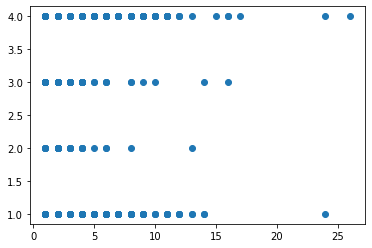

In [112]:
plt.scatter(hh_size_members_srl,hfias_hh_srl) 

In [113]:
import numpy as np
cov_land_cultivated_ha_srl = np.cov(land_cultivated_data_srl, hfias_hh_srl)
corrcoef_land_cultivated_ha_srl=np.corrcoef(land_cultivated_data_srl,hfias_hh_srl)#land_cultivated_ha
print(cov_land_cultivated_ha_srl)
print(corrcoef_land_cultivated_ha_srl) #plot

[[ 7.23908214 -0.49678543]
 [-0.49678543  1.65837692]]
[[ 1.         -0.14337898]
 [-0.14337898  1.        ]]


In [114]:
import numpy as np
cov_hh_size_members_srl = np.cov(hh_size_members_srl, hfias_hh_srl)
corrcoef_hh_size_members_srl=np.corrcoef(hh_size_members_srl,hfias_hh_srl)#land_cultivated_ha
print(cov_hh_size_members_srl)
print(corrcoef_hh_size_members_srl) #plot

[[ 9.52184864 -0.12800371]
 [-0.12800371  1.65837692]]
[[ 1.         -0.03221219]
 [-0.03221219  1.        ]]


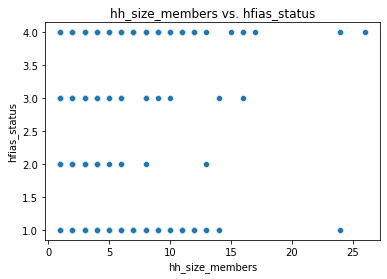

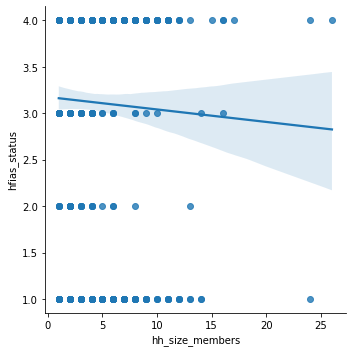

In [115]:
import seaborn as sns
ax1=sns.scatterplot(x='hh_size_members', y='hfias_status', data=land_cultivated_data_srl_1);
ax1.set_title("hh_size_members vs. hfias_status")
ax.set_xlabel("hh_size_members");
sns.lmplot(x='hh_size_members', y='hfias_status', data=land_cultivated_data_srl_1);

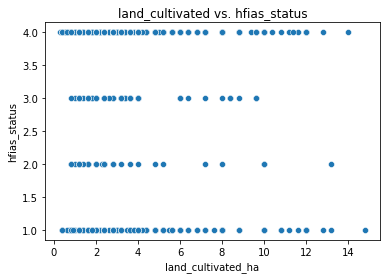

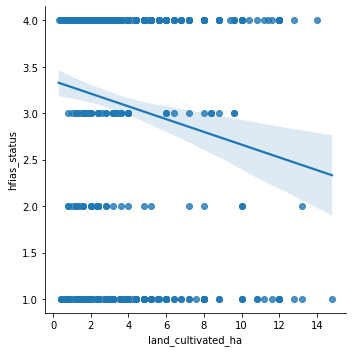

In [116]:
import seaborn as sns
ax1=sns.scatterplot(x='land_cultivated_ha', y='hfias_status', data=land_cultivated_data_srl_1);
ax1.set_title("land_cultivated vs. hfias_status")
ax.set_xlabel("land_cultivated");
sns.lmplot(x='land_cultivated_ha', y='hfias_status', data=land_cultivated_data_srl_1);

In [117]:
import numpy as np
X = food_safety_tz['land_cultivated_ha']
Y = food_safety_tz['hfias_status']
cov_land_cultivated_ha = np.cov(X, Y)
corrcoef_land_cultivated_ha=np.corrcoef(X,Y)#land_cultivated_ha

In [118]:

print(cov_land_cultivated_ha)
print(corrcoef_land_cultivated_ha) #plot

[[16.86202156  0.18264209]
 [ 0.18264209  1.81049334]]
[[1.         0.03305579]
 [0.03305579 1.        ]]


In [119]:
#X1 = food_safety_tz['land_cultivated_ha'] #clean
#Y1=food_safety_tz['hh_size_members']

#plt.scatter(X1,Y1)

In [120]:
#food_safety_hh=pd.DataFrame(food_safety_tz,columns=["hfias_status","hh_size_members","id_proj"])

In [121]:
#food_safety_hh

In [122]:
#food_safety_hh.groupby('hfias_status').hh_size_members.plot(kind='kde')  #hh_size_members

In [123]:
#plt.scatter(X,Y)#remove 800 and 400

In [124]:
#import matplotlib.pyplot as plt
#import numpy as np
#%matplotlib inline
#food_safety_tz.groupby('hfias_status').land_cultivated_ha.plot(kind='kde') #land_cultivated_ha

In [125]:
#import numpy as np
#X = food_safety_tz['hh_size_members']
#Y = food_safety_tz['hfias_status']
#result1 = np.cov(X, Y)
#result2=np.corrcoef(X,Y)#land_cultivated_ha

In [126]:
#result2

In [127]:
#food_safety_tz_processed_ha.groupby('hfias_status').land_cultivated_ha.hist()

In [128]:
#import numpy as np
#X1 = food_safety_tz['hh_size_members']
#Y1 = food_safety_tz['hfias_status']
#result1 = np.cov(X1, Y1)
#result2=np.corrcoef(X1,Y1) #hh_size_members

In [129]:
#X1.mean()

In [130]:
#import matplotlib.pyplot as plt
#import numpy as np
#%matplotlib inline
#food_safety_tz.groupby('hfias_status').hh_size_members.plot(kind='kde',grid=True)
#X1.plot.kde()

In [131]:
#food_safety_tz.groupby('hfias_status').hh_size_members.hist()